## Import Modules, Load Data and Data Review

In [1]:
#First, importing the neccesary libaries, such as numpy, pandas
import pandas as pd
import numpy as np

#Importing the plotting libraries, such as matplotlib and seaborn
import matplotlib.pyplot as plt
import seaborn as sns

#Importing the scaling libraries
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

#Importing the evaluation libraries, such as mean_squared_error, mean_absolute_error, r2_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

#Importing the train_test_split to split the data
from sklearn.model_selection import train_test_split

from scipy.stats import skew

#Importing the cross validation
from sklearn.model_selection import cross_validate

#Importing make_column_transformer for tranforming
from sklearn.compose import make_column_transformer

#Importing OneHotEncoder, OrdinalEncoder to use them on the object data
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder

#Importing ResidualsPlot
from yellowbrick.regressor import ResidualsPlot

#Importing PredictionError
from yellowbrick.regressor import PredictionError

#Importing RadViz
from yellowbrick.features import RadViz

#Importing LinearRegression model
from sklearn.linear_model import LinearRegression

#Importing Ridge model
from sklearn.linear_model import Ridge

#Importing GridSearchCV to find the best result from the hyperparameters
from sklearn.model_selection import GridSearchCV

#Importing ValidationCurve
from yellowbrick.model_selection import ValidationCurve

#Importing Lasso model
from sklearn.linear_model import Lasso

#Importing ElasticNet
from sklearn.linear_model import ElasticNet

#Importing RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor

#Importing pipeline
from sklearn.pipeline import Pipeline

#Importing ResidualsPlot
from yellowbrick.regressor import ResidualsPlot

#Importing LazyRegressor
from lazypredict.Supervised import LazyRegressor

#Importing pickle
import pickle

import warnings
warnings.filterwarnings('ignore')
plt.rcParams["figure.figsize"] = (14,6)
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 1000)
pd.options.display.float_format = '{:.3f}'.format

In [ ]:
# pip install scikit-learn==1.2.2

In [2]:
pip list

Package                       Version
----------------------------- ---------------
absl-py                       2.0.0
aiobotocore                   2.5.0
aiofiles                      22.1.0
aiohttp                       3.8.5
aioitertools                  0.7.1
aiosignal                     1.2.0
aiosqlite                     0.18.0
alabaster                     0.7.12
alembic                       1.12.0
anaconda-anon-usage           0.4.3
anaconda-catalogs             0.2.0
anaconda-client               1.11.3
anaconda-cloud-auth           0.1.3
anaconda-navigator            2.5.0
anaconda-project              0.11.1
anyio                         3.5.0
appdirs                       1.4.4
argon2-cffi                   21.3.0
argon2-cffi-bindings          21.2.0
arrow                         1.2.3
astroid                       2.14.2
astropy                       5.1
asttokens                     2.0.5
astunparse                    1.6.3
async-timeout                 4.0.2
atomicwri

In [3]:
#The test size
t = 0.2
#The random value
s = 101

In [2]:
#Reading the dataset from a csv file
df = pd.read_csv("final_scout_not_dummy.csv")

#Seeing the head of the data set
df.head()

,make_model,body_type,price,vat,km,Type,Fuel,Gears,Comfort_Convenience,Entertainment_Media,Extras,Safety_Security,age,Previous_Owners,hp_kW,Inspection_new,Paint_Type,Upholstery_type,Gearing_Type,Displacement_cc,Weight_kg,Drive_chain,cons_comb
0,Audi A1,Sedans,15770,VAT deductible,56013.000,Used,Diesel,7.000,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,Hands-free equipment,On-board comput...","Alloy wheels,Catalytic Converter,Voice Control","ABS,Central door lock,Daytime running lights,D...",3.000,2.000,66.000,1,Metallic,Cloth,Automatic,1422.000,1220.000,front,3.800
1,Audi A1,Sedans,14500,Price negotiable,80000.000,Used,Benzine,7.000,"Air conditioning,Automatic climate control,Hil...","Bluetooth,Hands-free equipment,On-board comput...","Alloy wheels,Sport seats,Sport suspension,Voic...","ABS,Central door lock,Central door lock with r...",2.000,1.000,141.000,0,Metallic,Cloth,Automatic,1798.000,1255.000,front,5.600
2,Audi A1,Sedans,14640,VAT deductible,83450.000,Used,Diesel,7.000,"Air conditioning,Cruise control,Electrical sid...","MP3,On-board computer","Alloy wheels,Voice Control","ABS,Central door lock,Daytime running lights,D...",3.000,1.000,85.000,0,Metallic,Cloth,Automatic,1598.000,1135.000,front,3.800
3,Audi A1,Sedans,14500,VAT deductible,73000.000,Used,Diesel,6.000,"Air suspension,Armrest,Auxiliary heating,Elect...","Bluetooth,CD player,Hands-free equipment,MP3,O...","Alloy wheels,Sport seats,Voice Control","ABS,Alarm system,Central door lock with remote...",3.000,1.000,66.000,0,Metallic,Cloth,Automatic,1422.000,1195.000,front,3.800
4,Audi A1,Sedans,16790,VAT deductible,16200.000,Used,Diesel,7.000,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,CD player,Hands-free equipment,MP3,O...","Alloy wheels,Sport package,Sport suspension,Vo...","ABS,Central door lock,Driver-side airbag,Elect...",3.000,1.000,66.000,1,Metallic,Cloth,Automatic,1422.000,1135.000,front,4.100


In [3]:
#Seeing the shape of the data set
df.shape
#As we can see, the shape of the data set is (15915, 23)

(15915, 23)

In [4]:
#Seeing the info of the data set
df.info()
#We can see that, there are about 15915 entries. 23 columns, float64(8), int64(2), object(13).
#There is no null data as well

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15915 entries, 0 to 15914
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   make_model           15915 non-null  object 
 1   body_type            15915 non-null  object 
 2   price                15915 non-null  int64  
 3   vat                  15915 non-null  object 
 4   km                   15915 non-null  float64
 5   Type                 15915 non-null  object 
 6   Fuel                 15915 non-null  object 
 7   Gears                15915 non-null  float64
 8   Comfort_Convenience  15915 non-null  object 
 9   Entertainment_Media  15915 non-null  object 
 10  Extras               15915 non-null  object 
 11  Safety_Security      15915 non-null  object 
 12  age                  15915 non-null  float64
 13  Previous_Owners      15915 non-null  float64
 14  hp_kW                15915 non-null  float64
 15  Inspection_new       15915 non-null 

In [5]:
#Seeing the description of the dataset
df.describe().T
#We can see that the mean anst std for age, Inspection_new, and Previous_Owners are nearly close to each other

,count,mean,std,min,25%,50%,75%,max
price,15915.000,18024.381,7381.679,4950.000,12850.000,16900.000,21900.000,74600.000
km,15915.000,32089.996,36977.215,0.000,1920.500,20413.000,46900.000,317000.000
Gears,15915.000,5.937,0.705,5.000,5.000,6.000,6.000,8.000
age,15915.000,1.390,1.121,0.000,0.000,1.000,2.000,3.000
Previous_Owners,15915.000,1.043,0.339,0.000,1.000,1.000,1.000,4.000
hp_kW,15915.000,88.499,26.674,40.000,66.000,85.000,103.000,294.000
Inspection_new,15915.000,0.247,0.431,0.000,0.000,0.000,0.000,1.000
Displacement_cc,15915.000,1428.662,275.804,890.000,1229.000,1461.000,1598.000,2967.000
Weight_kg,15915.000,1337.701,199.682,840.000,1165.000,1295.000,1472.000,2471.000
cons_comb,15915.000,4.832,0.868,3.000,4.100,4.800,5.400,9.100


In [6]:
#Checking the duplicated values
df.duplicated().sum()
#As we can see, there are about 1673 duplicated values

1673

In [7]:
#Dropping the duplicated values
df.drop_duplicates(inplace=True)

In [8]:
#Checking the duplicated values after dropping
df.duplicated().sum()
#As we can see, now we have 0 duplicated values

0

In [9]:
#Checking the null values in the data set
df.isnull().sum()
#As we can see, we do not have null values

make_model             0
body_type              0
price                  0
vat                    0
km                     0
Type                   0
Fuel                   0
Gears                  0
Comfort_Convenience    0
Entertainment_Media    0
Extras                 0
Safety_Security        0
age                    0
Previous_Owners        0
hp_kW                  0
Inspection_new         0
Paint_Type             0
Upholstery_type        0
Gearing_Type           0
Displacement_cc        0
Weight_kg              0
Drive_chain            0
cons_comb              0
dtype: int64

In [10]:
#Seeing the columns of the data set
df.columns

Index(['make_model', 'body_type', 'price', 'vat', 'km', 'Type', 'Fuel',
       'Gears', 'Comfort_Convenience', 'Entertainment_Media', 'Extras',
       'Safety_Security', 'age', 'Previous_Owners', 'hp_kW', 'Inspection_new',
       'Paint_Type', 'Upholstery_type', 'Gearing_Type', 'Displacement_cc',
       'Weight_kg', 'Drive_chain', 'cons_comb'],
      dtype='object')

In [11]:
#Dropping vat from the dataset
df.drop(columns=["vat", "Displacement_cc", 'body_type', 'Type', 'Weight_kg', 'Gearing_Type' ,'Fuel', 'Comfort_Convenience', 'Entertainment_Media', 'Extras','Safety_Security', 'Previous_Owners', 'Inspection_new','Paint_Type', 'Upholstery_type','Drive_chain', 'cons_comb'], inplace=True)

## EDA

### make_model

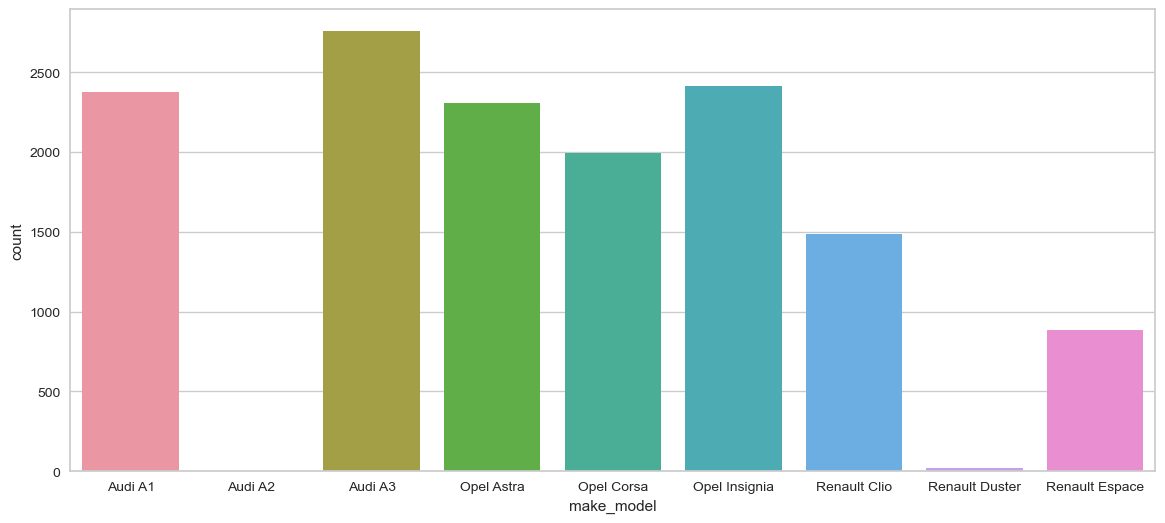

In [12]:
#Seeing the countplot of make_model
sns.countplot(x=df["make_model"])
plt.show()
#As we can see from the graph, we have 9 classes, for Audi A3 and Renault Duster, they are not high at all, and there values
#are so small compared to the others

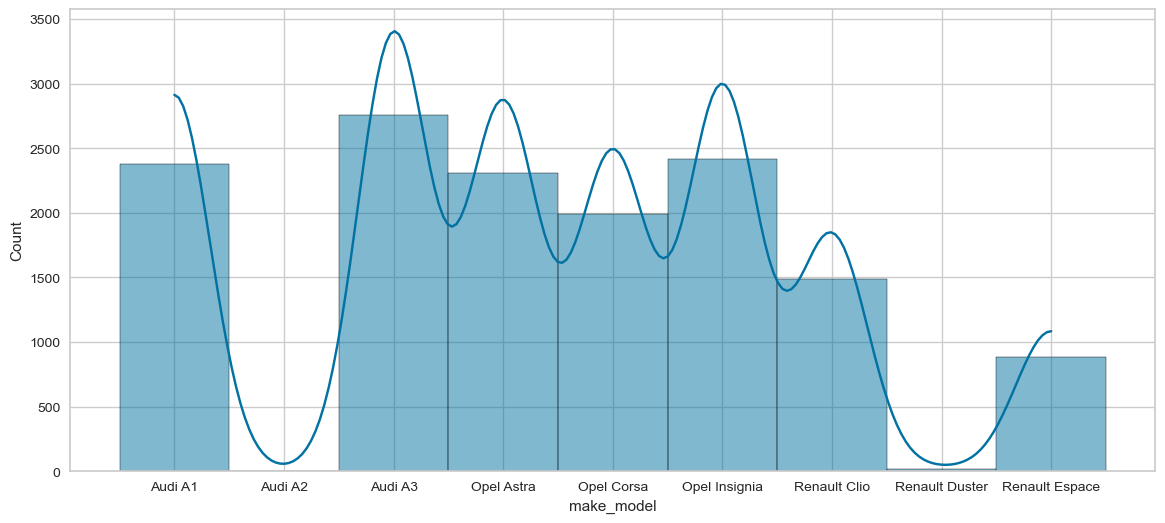

In [13]:
#Seeing the histplot of make_model
sns.histplot(df["make_model"], kde=True)
plt.show()
#We can see the same here as well, the values of Audi A3 and Renault Duster are so small

In [14]:
#Seeing the value counts of make_model
df.make_model.value_counts()
#As we can see, there are some of them have low values, so i am going to drop them (Audi A3 and Renault Duster)

make_model
Audi A3           2758
Opel Insignia     2417
Audi A1           2377
Opel Astra        2305
Opel Corsa        1994
Renault Clio      1486
Renault Espace     884
Renault Duster      20
Audi A2              1
Name: count, dtype: int64

In [15]:
#Making a variable to see the classes that have less than 100, as it may affect the model
low = df.make_model.value_counts()[df.make_model.value_counts() <= 100].index
low

Index(['Renault Duster', 'Audi A2'], dtype='object', name='make_model')

In [16]:
#Dropping the low values of make_model
for i in low:
    drop_index = df[df['make_model'] == i].index
    df.drop(index = drop_index, inplace=True)

df.reset_index(drop=True, inplace=True)

In [17]:
#Seeing the value counts of make_model after dropping
df.make_model.value_counts()
#As we can see, now we do not have classes with less than 100

make_model
Audi A3           2758
Opel Insignia     2417
Audi A1           2377
Opel Astra        2305
Opel Corsa        1994
Renault Clio      1486
Renault Espace     884
Name: count, dtype: int64

### price

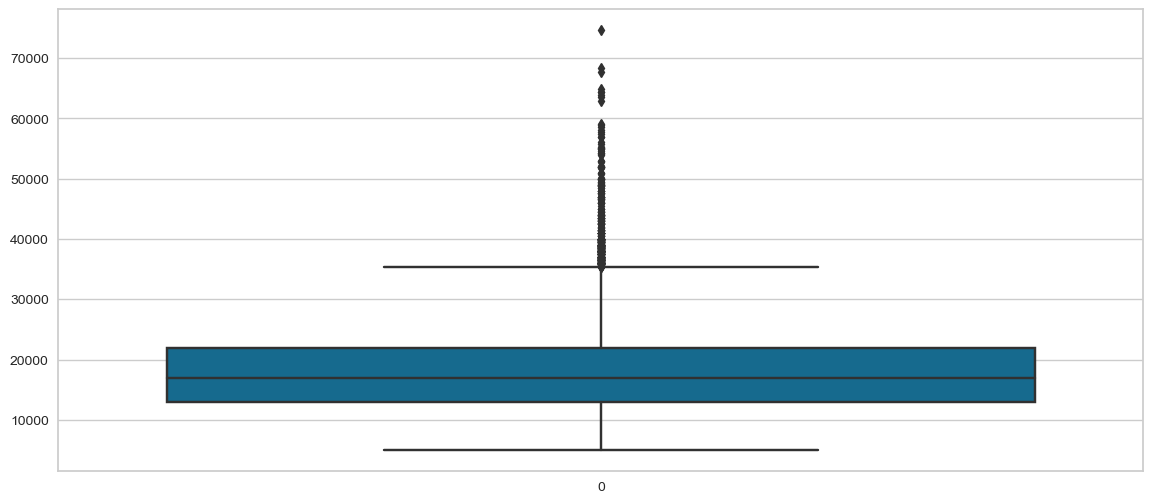

In [18]:
#Seeing teh boxplot of price
sns.boxplot(df['price'])
plt.show()
#As we can see, there are some outliers in price, i am going to drop them in the feature engineering part

In [19]:
#Seeing the value counts of price
df.price.value_counts()

price
14990    124
15990    121
15900    105
17990    100
10990     92
        ... 
20860      1
21005      1
21334      1
21360      1
39875      1
Name: count, Length: 2948, dtype: int64

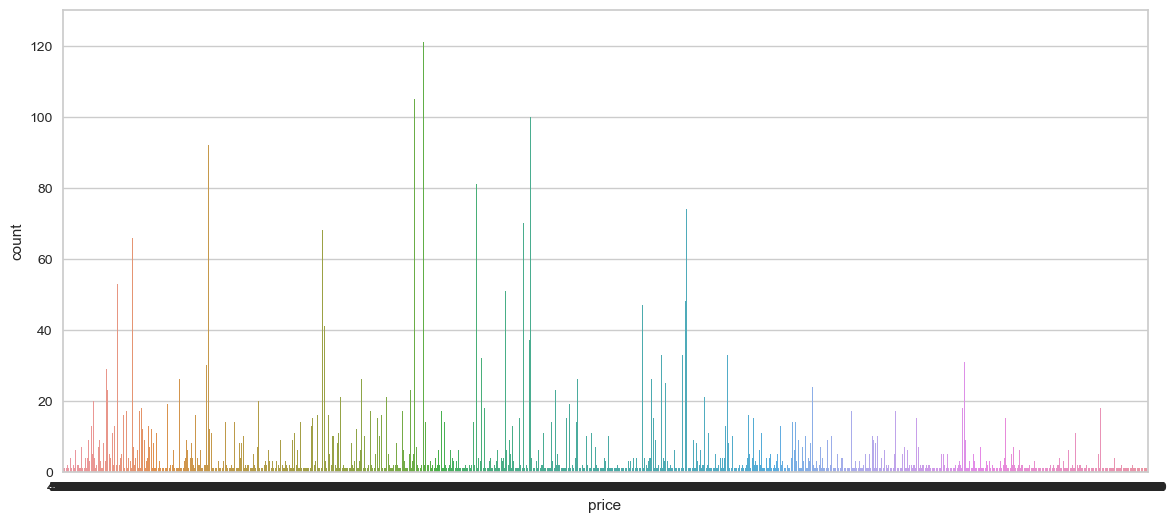

In [20]:
#Seeing the countplot of price
sns.countplot(x=df["price"])
plt.show()
#As we can see from the graph, there are a lot of values. So, it is not shown very well in this countplot

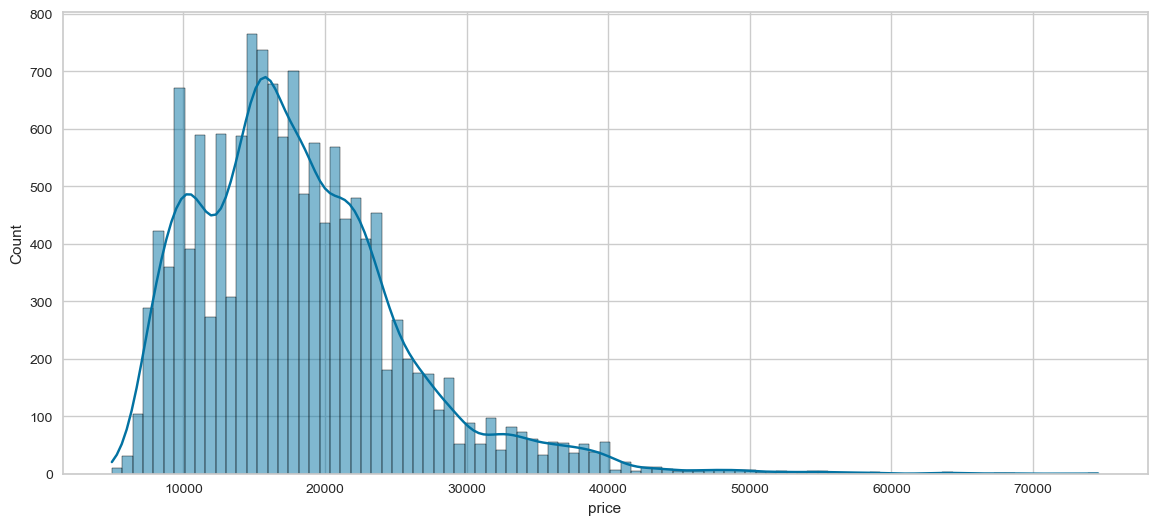

In [21]:
#Seeing the histplot of price
sns.histplot(df["price"], kde=True)
plt.show()
#As we can see, there are low values from about 40000 to 70000

### km

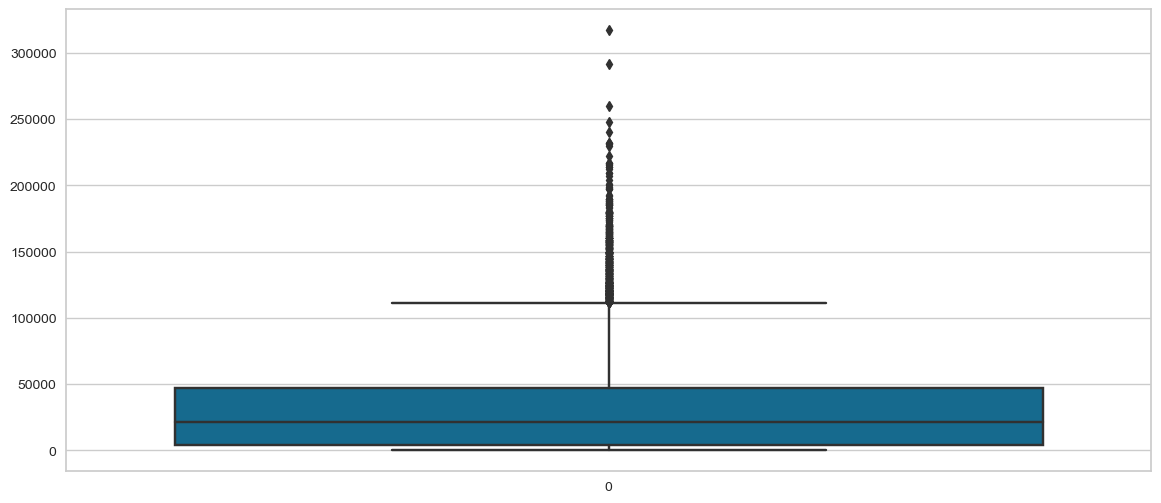

In [22]:
#SEeing teh boxplot of km
sns.boxplot(df['km'])
plt.show()
#As we can see, there are some outliers in km

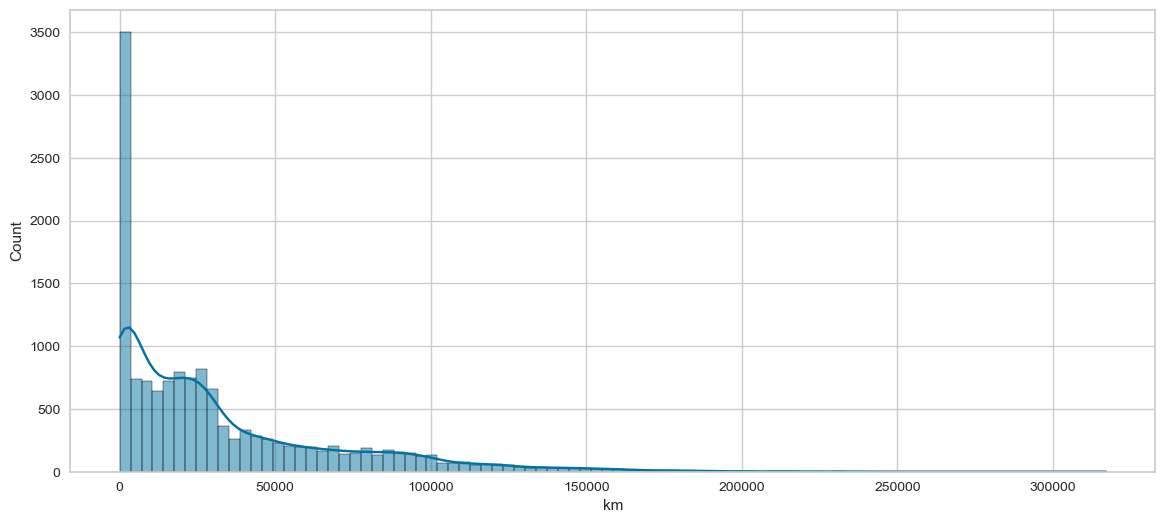

In [23]:
#Seeing the histplot of km
sns.histplot(df["km"], kde=True)
plt.show()

### age 

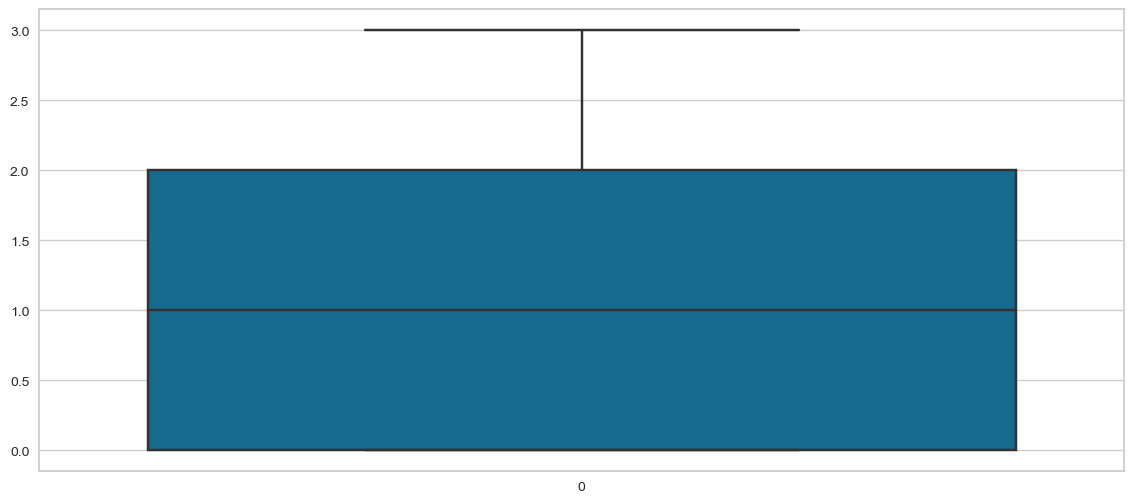

In [24]:
#Seeing teh boxplot of age
sns.boxplot(df['age'])
plt.show()
#As we can see, there is no outliers

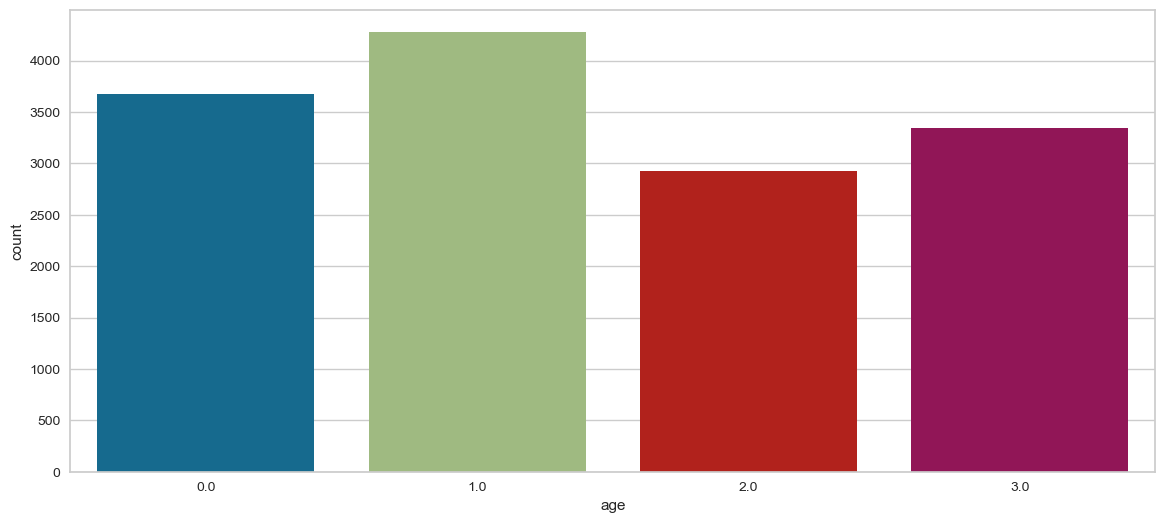

In [25]:
#Seeing the countplot of age
sns.countplot(x=df["age"])
plt.show()
#As we can see from the graph, there are 4 classes and class one is the highest

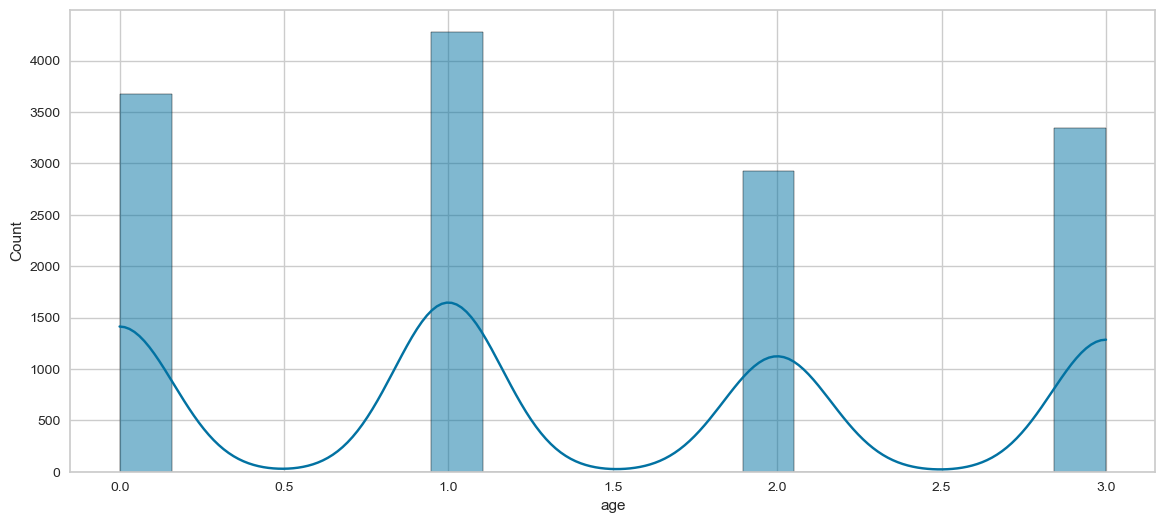

In [26]:
#Seeing the histplot of age
sns.histplot(df["age"], kde=True)
plt.show()

### hp_kW 

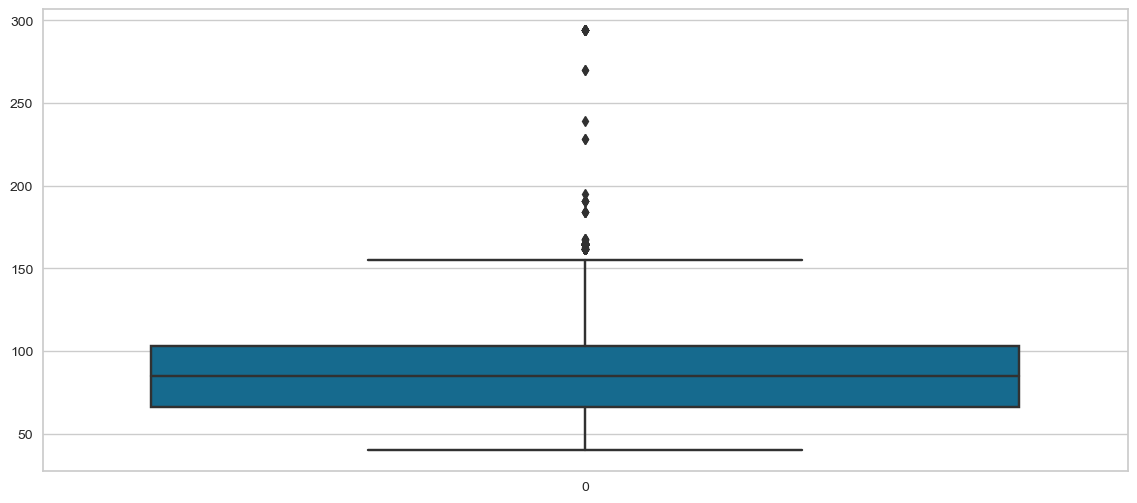

In [27]:
#SEeing teh boxplot of hp_kW
sns.boxplot(df['hp_kW'])
plt.show()
#As we can see, there are some outliers in hp_kW

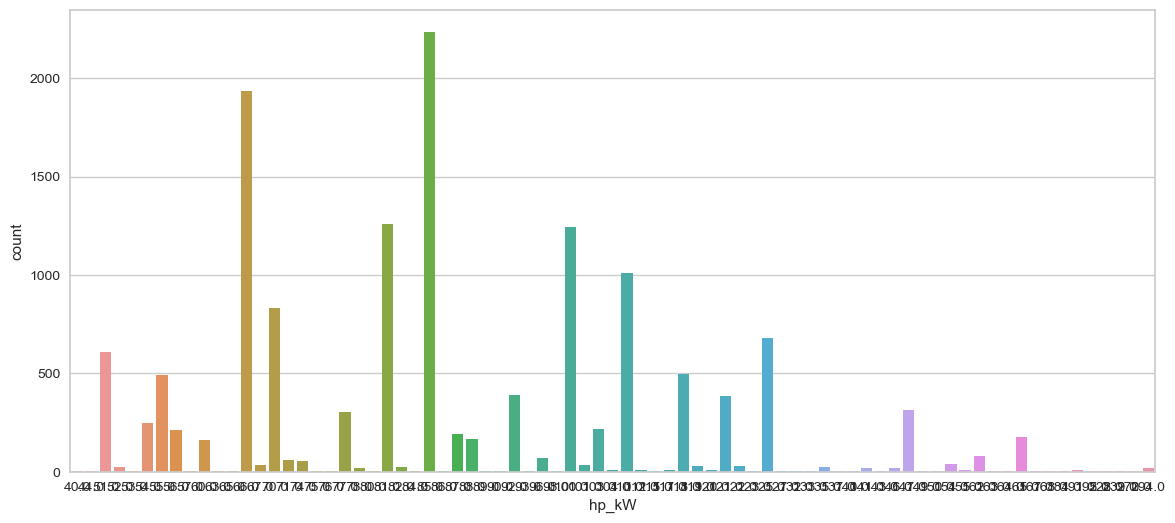

In [28]:
#Seeing the countplot of hp_kW
sns.countplot(x=df["hp_kW"])
plt.show()

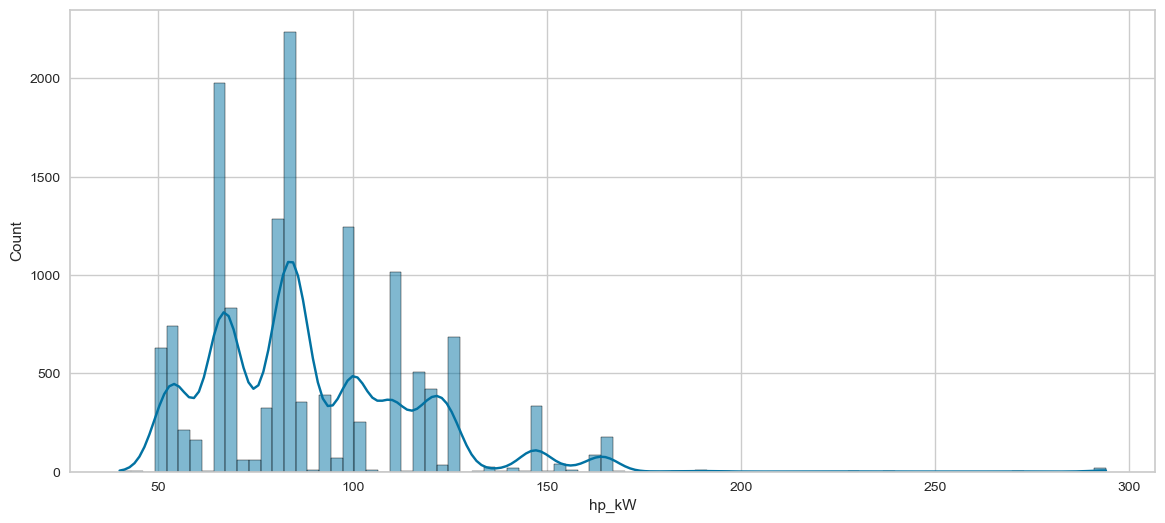

In [29]:
#Seeing the histplot of hp_kW
sns.histplot(df["hp_kW"], kde=True)
plt.show()

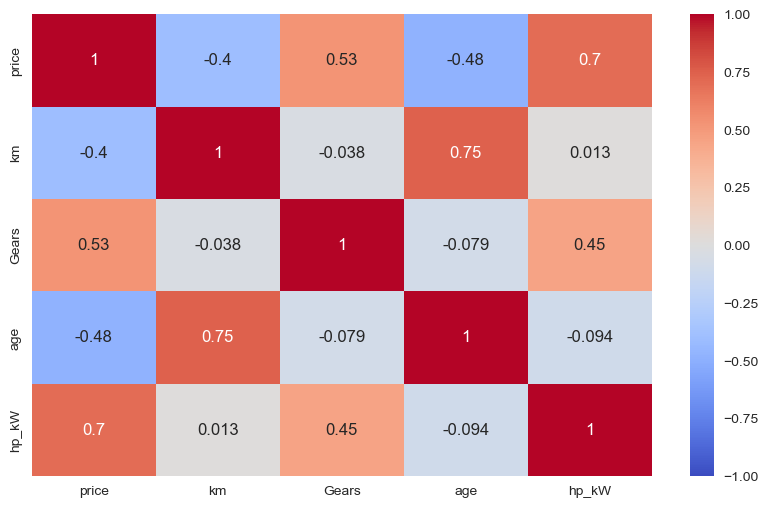

In [30]:
#Seeing the correlation 
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), vmin=-1, vmax=1, annot =True, cmap="coolwarm");
#As we can see, there is not correlation here

In [31]:
#Seeing the multicollinearity
df.corr(numeric_only=True)[(abs(df.corr(numeric_only=True))>= 0.9) & (abs(df.corr(numeric_only=True)) < 1)].any().any()
#As we can see, we do not have multicollinearity

False

## Feature Engineering

In [33]:
#Seeing the head of the data 
df.head()
#Well, from the EDA, i can not see vat as a important feature, so i am going to drop it. The reason for this is that 
#this may affect our target which is the price, so in my opinio, dropping it is better

,make_model,price,km,Gears,age,hp_kW
0,Audi A1,15770,56013.000,7.000,3.000,66.000
1,Audi A1,14500,80000.000,7.000,2.000,141.000
2,Audi A1,14640,83450.000,7.000,3.000,85.000
3,Audi A1,14500,73000.000,6.000,3.000,66.000
4,Audi A1,16790,16200.000,7.000,3.000,66.000


In [34]:
#Seeing the head of the dataset after dropping vat
df.head()
#As we can see, we do not have vat column now

,make_model,price,km,Gears,age,hp_kW
0,Audi A1,15770,56013.000,7.000,3.000,66.000
1,Audi A1,14500,80000.000,7.000,2.000,141.000
2,Audi A1,14640,83450.000,7.000,3.000,85.000
3,Audi A1,14500,73000.000,6.000,3.000,66.000
4,Audi A1,16790,16200.000,7.000,3.000,66.000


In [35]:
#Seeing the object columns in the dataset and assignt it to a variable
df_ob = df.select_dtypes(include ="object").head()
df_ob
#As we can see, there are a lot of object columns in the dataset

,make_model
0,Audi A1
1,Audi A1
2,Audi A1
3,Audi A1
4,Audi A1


In [36]:
#Dropping the prices that more than 40000
df = df[df['price'] < 40000]
df

,make_model,price,km,Gears,age,hp_kW
0,Audi A1,15770,56013.000,7.000,3.000,66.000
1,Audi A1,14500,80000.000,7.000,2.000,141.000
2,Audi A1,14640,83450.000,7.000,3.000,85.000
3,Audi A1,14500,73000.000,6.000,3.000,66.000
4,Audi A1,16790,16200.000,7.000,3.000,66.000
...,...,...,...,...,...,...
14216,Renault Espace,39980,100.000,6.000,0.000,118.000
14217,Renault Espace,39950,1647.363,6.000,0.000,147.000
14218,Renault Espace,39950,1000.000,6.000,0.000,165.000
14219,Renault Espace,39885,9900.000,7.000,0.000,165.000


In [37]:
#Seeing the prices after filtering
df.price

0        15770
1        14500
2        14640
3        14500
4        16790
         ...  
14216    39980
14217    39950
14218    39950
14219    39885
14220    39875
Name: price, Length: 14070, dtype: int64

In [38]:
#Seeing the sum of prices that are more than 40000
(df.price > 40000).sum()

0

In [39]:
#Seeing the prices that less than 40000
(df.price < 40000).sum()

14070

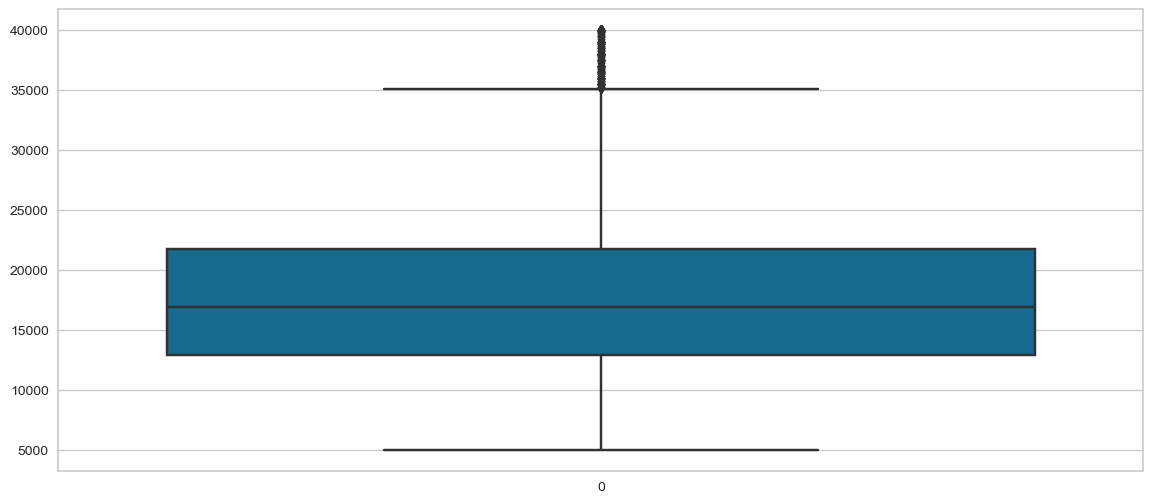

In [40]:
#SEeing teh boxplot of price after filterring 
sns.boxplot(df['price'])
plt.show()
#As we can see, there are some outliers in price, but it is not like before dropping them, the percentage now is low

In [42]:
df2 = df.copy()
df2.head()

,make_model,price,km,Gears,age,hp_kW
0,Audi A1,15770,56013.000,7.000,3.000,66.000
1,Audi A1,14500,80000.000,7.000,2.000,141.000
2,Audi A1,14640,83450.000,7.000,3.000,85.000
3,Audi A1,14500,73000.000,6.000,3.000,66.000
4,Audi A1,16790,16200.000,7.000,3.000,66.000


In [43]:
df2.to_csv('df2.csv')

## Modeling

### Train | Test Split

In [42]:
#Splitting the data to X and y
X = df.drop(columns="price")
y = df.price

In [43]:
#Seeing the head of X
X.head()

,make_model,km,Gears,age,hp_kW
0,Audi A1,56013.000,7.000,3.000,66.000
1,Audi A1,80000.000,7.000,2.000,141.000
2,Audi A1,83450.000,7.000,3.000,85.000
3,Audi A1,73000.000,6.000,3.000,66.000
4,Audi A1,16200.000,7.000,3.000,66.000


In [44]:
#seeing the head of y
y.head()

0    15770
1    14500
2    14640
3    14500
4    16790
Name: price, dtype: int64

In [45]:
#Seeing the shape of X and y
print('X shape is:', X.shape)
print('y shape is:', y.shape)

X shape is: (14070, 5)
y shape is: (14070,)


In [46]:
#Splitting the data to train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=t, random_state=s)

In [47]:
#Seeing the shape of X_train and X_test
print('X_train, shape is:', X_train.shape)
print('X_test shape is:', X_test.shape)


#Seeing the shape of y_train and y_test
print('y_train, shape is:', y_train.shape)
print('y_test shape is:', y_test.shape)

X_train, shape is: (11256, 5)
X_test shape is: (2814, 5)
y_train, shape is: (11256,)
y_test shape is: (2814,)


In [48]:
#Seeing the head of X_train
X_train.head()

,make_model,km,Gears,age,hp_kW
8963,Opel Corsa,9.000,6.000,0.000,66.000
13900,Renault Espace,21709.000,6.000,2.000,118.000
11322,Opel Insignia,1647.363,6.000,0.000,100.000
2917,Audi A3,156000.000,6.000,3.000,81.000
10780,Opel Insignia,29900.000,6.000,1.000,125.000


In [49]:
#Seeing the head of X_test
X_test.head()

,make_model,km,Gears,age,hp_kW
2102,Audi A1,4500.000,5.000,0.000,66.000
1985,Audi A1,7500.000,7.000,0.000,85.000
11624,Opel Insignia,1647.363,6.000,0.000,121.000
666,Audi A1,11707.000,5.000,1.000,60.000
7689,Opel Corsa,22635.000,6.000,3.000,66.000


In [50]:
#Seeing the head of y_train
y_train.head()

8963     16990
13900    29990
11322    34490
2917     11990
10780    23970
Name: price, dtype: int64

In [51]:
#Seeing the head of y_test
y_test.head()

2102     20000
1985     24999
11624    33335
666      14220
7689     11990
Name: price, dtype: int64

In [52]:
#Seeing the object classes in the data set
df.select_dtypes(include="object").head(1)

,make_model
0,Audi A1


In [53]:
cat_ob = X_train.select_dtypes("object").columns
cat_ob

Index(['make_model'], dtype='object')

In [54]:
ord_enc = OrdinalEncoder()
trans = make_column_transformer((ord_enc, cat_ob), remainder='passthrough', verbose_feature_names_out=False).set_output(transform="pandas")
# remainder: # Keep other columns rather than cat in original form.
# remainder: # if you want to scale rest of cat columns use "minmax" istead passthroug
    
    # Apply ord_enc to categoric variables and remain in original form rest of them.
    # ord_enc for DT based algorithms
    # For Linear reg, log reg vs. use one hot encoder 

In [55]:
#Seeing the head of X_train
X_train.head()

,make_model,km,Gears,age,hp_kW
8963,Opel Corsa,9.000,6.000,0.000,66.000
13900,Renault Espace,21709.000,6.000,2.000,118.000
11322,Opel Insignia,1647.363,6.000,0.000,100.000
2917,Audi A3,156000.000,6.000,3.000,81.000
10780,Opel Insignia,29900.000,6.000,1.000,125.000


In [56]:
#Fitting the trans with X_train
X_train_trans = trans.fit_transform(X_train)

#Fitting the trans with X_test
X_test_trans = trans.transform(X_test)

In [57]:
#Seeing X_train_trans after converting
X_train_trans

,make_model,km,Gears,age,hp_kW
8963,3.000,9.000,6.000,0.000,66.000
13900,6.000,21709.000,6.000,2.000,118.000
11322,4.000,1647.363,6.000,0.000,100.000
2917,1.000,156000.000,6.000,3.000,81.000
10780,4.000,29900.000,6.000,1.000,125.000
...,...,...,...,...,...
5718,2.000,36600.000,5.000,3.000,77.000
8029,3.000,8930.000,6.000,1.000,66.000
1361,0.000,7987.000,7.000,1.000,141.000
1547,0.000,6600.000,7.000,1.000,85.000


In [58]:
#Seeing X_train without transforming or using encoder on it
X_train

,make_model,km,Gears,age,hp_kW
8963,Opel Corsa,9.000,6.000,0.000,66.000
13900,Renault Espace,21709.000,6.000,2.000,118.000
11322,Opel Insignia,1647.363,6.000,0.000,100.000
2917,Audi A3,156000.000,6.000,3.000,81.000
10780,Opel Insignia,29900.000,6.000,1.000,125.000
...,...,...,...,...,...
5718,Opel Astra,36600.000,5.000,3.000,77.000
8029,Opel Corsa,8930.000,6.000,1.000,66.000
1361,Audi A1,7987.000,7.000,1.000,141.000
1547,Audi A1,6600.000,7.000,1.000,85.000


In [59]:
#Seeing the shape of X_train_trans and X_test_trans
X_train_trans.shape, X_test_trans.shape 

((11256, 5), (2814, 5))

In [60]:
#Seeing the head of X_train_trans
X_train_trans.head()

,make_model,km,Gears,age,hp_kW
8963,3.000,9.000,6.000,0.000,66.000
13900,6.000,21709.000,6.000,2.000,118.000
11322,4.000,1647.363,6.000,0.000,100.000
2917,1.000,156000.000,6.000,3.000,81.000
10780,4.000,29900.000,6.000,1.000,125.000


In [61]:
#Seeing the head of X_test_trans
X_test_trans.head()

,make_model,km,Gears,age,hp_kW
2102,0.000,4500.000,5.000,0.000,66.000
1985,0.000,7500.000,7.000,0.000,85.000
11624,4.000,1647.363,6.000,0.000,121.000
666,0.000,11707.000,5.000,1.000,60.000
7689,3.000,22635.000,6.000,3.000,66.000


#### Eval Function

In [62]:
#Creating the eval function to see the metrics
# Pre-defined functions

def eval(model, X_train, y_train, X_test, y_test):
    """This function will help you get regression metrics on both train
    and test set provided.

    Args:
        model : model that is used for prediction
        X_train : Train features
        y_train : Train target
        X_test  : Test features
        y_test  : Test target

    Returns:
        Dataframe : Returns scores dataframe
    """

    y_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train)

    scores = {"train": {"R2" : r2_score(y_train, y_train_pred),
    "mae" : mean_absolute_error(y_train, y_train_pred),
    "mse" : mean_squared_error(y_train, y_train_pred),
    "rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred))},

    "test": {"R2" : r2_score(y_test, y_pred),
    "mae" : mean_absolute_error(y_test, y_pred),
    "mse" : mean_squared_error(y_test, y_pred),
    "rmse" : np.sqrt(mean_squared_error(y_test, y_pred))}}

    return pd.DataFrame(scores)


# Adjusted R2 Score
def adj_r2(y_test, y_pred, X):
    """This function gives adjusted R^2

    Args:
        y_test : Actual target
        y_pred : Predcition
        X : Features

    Returns:
        adj_r2: Adjusted R^2
    """
    r2 = r2_score(y_test, y_pred)
    n = X.shape[0]   # number of observations
    p = X.shape[1]   # number of independent variables
    adj_r2 = 1 - (1-r2)*(n-1)/(n-p-1)
    return adj_r2


### RF Model

In [63]:
#Creating the model of rf with the best params
rf_model = RandomForestRegressor(max_depth= 10, max_features = 2, n_estimators= 200,  random_state=s)

#the operations of the pipeline
operations = [("encoder", trans), ("RF_model", rf_model)]
#Creating the pipeline
pipe_rf_m = Pipeline(steps=operations)
#Fitting the model with the training data
pipe_rf_m.fit(X_train, y_train)

Pipeline(steps=[('encoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(),
                                                  Index(['make_model'], dtype='object'))],
                                   verbose_feature_names_out=False)),
                ('RF_model',
                 RandomForestRegressor(max_depth=10, max_features=2,
                                       n_estimators=200, random_state=101))])

In [64]:
#seeing the result of the grid search model
eval(pipe_rf_m, X_train, y_train, X_test, y_test)
#From here, we can see that the result is better now, but for mse, it is still huge.

,train,test
R2,0.937,0.921
mae,1140.623,1283.880
mse,2875784.112,3620166.998
rmse,1695.814,1902.674


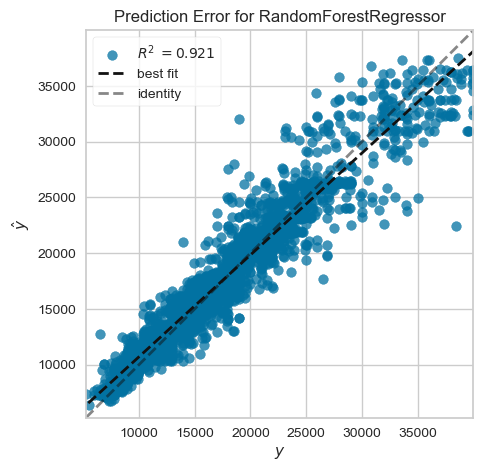

In [65]:
#Visualizing the result
visualizer = RadViz(size=(500, 1000))

visualizer = PredictionError(pipe_rf_m)
visualizer.fit(X_train, y_train) # Fit the training data to the visualizer
visualizer.score(X_test, y_test) # Evaluate the model on the test data
visualizer.show();
#As we can see, there are some difference between the acual and the predicted line, it nearly started to be different from around 30000

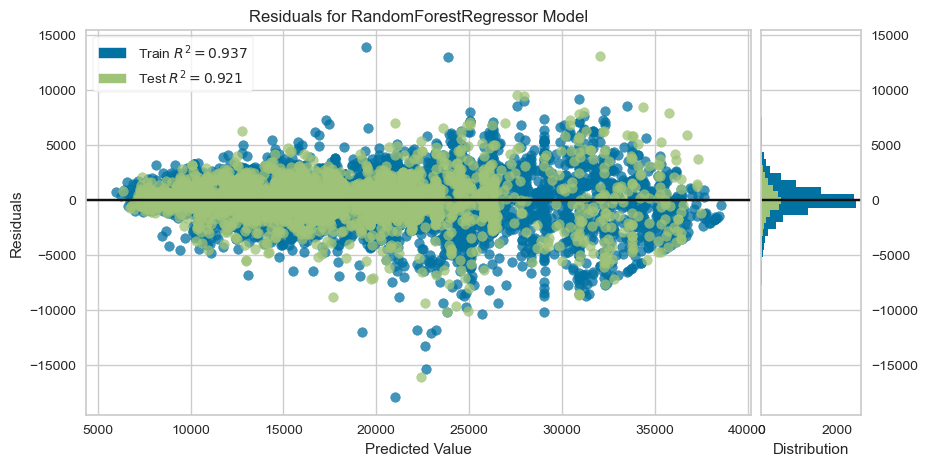

In [66]:
#Seeing the result with train and test for r2
visualizer = RadViz(size=(1000, 500))
visualizer = ResidualsPlot(pipe_rf_m)

visualizer.fit(X_train, y_train) # Fit the training data to the visualizer
visualizer.score(X_test, y_test) # Evaluate the model on the test data
visualizer.show();
#As we can see, there are some mistakes, and it started from about 30000

In [67]:
#Prediction X_test
y_pred = pipe_rf_m.predict(X_test)

In [68]:
#Saving the result to use them later
rf_R2 = r2_score(y_test, y_pred)
rf_mae = mean_absolute_error(y_test, y_pred)
rf_rmse = mean_squared_error(y_test, y_pred, squared=False)

In [69]:
#Printing the result
print('linear_R2', rf_R2)
print('linear_mae', rf_mae)
print('linear_rmse', rf_rmse)

linear_R2 0.92109155489447
linear_mae 1283.8798218585746
linear_rmse 1902.6736447053595


## Final Modle

In [70]:
#Creating the model of rf with the best params
rf = RandomForestRegressor(max_depth= 10, max_features = 2, n_estimators= 200,  random_state=s)

#the operations of the pipeline
operations = [("encoder", trans), ("RF_model", rf)]
#Creating the pipeline
final_rf = Pipeline(steps=operations)
#Fitting the model with the whole data
final_rf.fit(X, y)

Pipeline(steps=[('encoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(),
                                                  Index(['make_model'], dtype='object'))],
                                   verbose_feature_names_out=False)),
                ('RF_model',
                 RandomForestRegressor(max_depth=10, max_features=2,
                                       n_estimators=200, random_state=101))])

In [71]:
df.columns

Index(['make_model', 'price', 'km', 'Gears', 'age', 'hp_kW'], dtype='object')

In [72]:
my_dict = {
    'make_model': 'Renault Espace',
    'km': 80000.000,
    'Gears': 7.000, 
    'age': 2.000,
    'hp_kW': 66.000
}

In [73]:
data = pd.DataFrame.from_dict([my_dict])
data

,make_model,km,Gears,age,hp_kW
0,Renault Espace,80000.000,7.000,2.000,66.000


In [74]:
prediction = final_rf.predict(data)
print(prediction)

[16004.66494716]


In [75]:
print("The estimated price is {}. ".format(int(prediction[0])))

The estimated price is 16004. 


## Saving the model

In [76]:
pickle.dump(final_rf, open('final_rf', 'wb'))

## deployment

In [77]:
new_model = pickle.load(open('final_rf', 'rb'))

### Predicgion

In [78]:
df.make_model

0               Audi A1
1               Audi A1
2               Audi A1
3               Audi A1
4               Audi A1
              ...      
14216    Renault Espace
14217    Renault Espace
14218    Renault Espace
14219    Renault Espace
14220    Renault Espace
Name: make_model, Length: 14070, dtype: object

In [79]:
my_dict2 = {
    'make_model': 'Audi A1',
    'km': 50000.000,
    'Gears': 3.000, 
    'age': 4.000,
    'hp_kW': 66.000
}

In [80]:
data2 = pd.DataFrame.from_dict([my_dict2])
data2

,make_model,km,Gears,age,hp_kW
0,Audi A1,50000.000,3.000,4.000,66.000


In [81]:
prediction2 = new_model.predict(data2)
print(prediction2)

[13413.36458918]


In [82]:
print("The estimated price is {}. ".format(int(prediction2[0])))

The estimated price is 13413. 


In [83]:
prediction3 = new_model.predict(data)
print(prediction3)

[16004.66494716]


In [84]:
print("The estimated price is {}. ".format(int(prediction3[0])))

The estimated price is 16004. 


In [85]:
conda env list

# conda environments:
#
base                  *  C:\Users\habob\anaconda3
env_name                 C:\Users\habob\anaconda3\envs\env_name


Note: you may need to restart the kernel to use updated packages.


In [86]:
pip list

Package                       Version
----------------------------- ---------------
absl-py                       2.0.0
aiobotocore                   2.5.0
aiofiles                      22.1.0
aiohttp                       3.8.5
aioitertools                  0.7.1
aiosignal                     1.2.0
aiosqlite                     0.18.0
alabaster                     0.7.12
alembic                       1.12.0
anaconda-anon-usage           0.4.3
anaconda-catalogs             0.2.0
anaconda-client               1.11.3
anaconda-cloud-auth           0.1.3
anaconda-navigator            2.5.0
anaconda-project              0.11.1
anyio                         3.5.0
appdirs                       1.4.4
argon2-cffi                   21.3.0
argon2-cffi-bindings          21.2.0
arrow                         1.2.3
astroid                       2.14.2
astropy                       5.1
asttokens                     2.0.5
astunparse                    1.6.3
async-timeout                 4.0.2
atomicwri

In [87]:
pip install -r requirements.txt

  Using cached streamlit-1.22.0-py2.py3-none-any.whl (8.9 MB)
  Using cached altair-4.2.2-py3-none-any.whl (813 kB)
  Using cached blinker-1.7.0-py3-none-any.whl (13 kB)
  Using cached protobuf-3.20.3-py2.py3-none-any.whl (162 kB)
  Using cached Pympler-1.0.1-py3-none-any.whl (164 kB)
  Using cached rich-13.7.0-py3-none-any.whl (240 kB)
  Using cached tzlocal-5.2-py3-none-any.whl (17 kB)
  Using cached validators-0.22.0-py3-none-any.whl (26 kB)
  Using cached GitPython-3.1.40-py3-none-any.whl (190 kB)
  Using cached pydeck-0.8.1b0-py2.py3-none-any.whl (4.8 MB)
  Using cached gitdb-4.0.11-py3-none-any.whl (62 kB)
  Using cached smmap-5.0.1-py3-none-any.whl (24 kB)
  Attempting uninstall: protobuf
    Found existing installation: protobuf 4.24.4
    Uninstalling protobuf-4.24.4:
      Successfully uninstalled protobuf-4.24.4
Note: you may need to restart the kernel to use updated packages.


In [88]:
pip list

Package                       Version
----------------------------- ---------------
absl-py                       2.0.0
aiobotocore                   2.5.0
aiofiles                      22.1.0
aiohttp                       3.8.5
aioitertools                  0.7.1
aiosignal                     1.2.0
aiosqlite                     0.18.0
alabaster                     0.7.12
alembic                       1.12.0
altair                        4.2.2
anaconda-anon-usage           0.4.3
anaconda-catalogs             0.2.0
anaconda-client               1.11.3
anaconda-cloud-auth           0.1.3
anaconda-navigator            2.5.0
anaconda-project              0.11.1
anyio                         3.5.0
appdirs                       1.4.4
argon2-cffi                   21.3.0
argon2-cffi-bindings          21.2.0
arrow                         1.2.3
astroid                       2.14.2
astropy                       5.1
asttokens                     2.0.5
astunparse                    1.6.3
async-tim

In [89]:
!streamlit run my_app.py

^C


In [90]:
df.columns

Index(['make_model', 'price', 'km', 'Gears', 'age', 'hp_kW'], dtype='object')

In [91]:
df.make_model.value_counts()

make_model
Audi A3           2735
Opel Insignia     2391
Audi A1           2377
Opel Astra        2305
Opel Corsa        1994
Renault Clio      1486
Renault Espace     782
Name: count, dtype: int64

In [92]:
'Audi A3', 'Opel Insignia', 'Audi A1', 'Opel Astra', 'Opel Corsa', 'Renault Clio', 'Renault Espace'

('Audi A3',
 'Opel Insignia',
 'Audi A1',
 'Opel Astra',
 'Opel Corsa',
 'Renault Clio',
 'Renault Espace')

In [93]:
df.hp_kW.value_counts()

hp_kW
85.000     2237
66.000     1935
81.000     1261
100.000    1242
110.000    1008
70.000      832
125.000     674
51.000      609
55.000      490
118.000     488
92.000      388
121.000     377
77.000      303
147.000     263
54.000      246
103.000     218
56.000      209
87.000      189
88.000      164
60.000      160
165.000     130
162.000      81
96.000       70
71.000       57
74.000       55
67.000       36
154.000      34
101.000      33
119.000      30
122.000      29
135.000      23
82.000       21
52.000       21
78.000       20
141.000      16
146.000      14
120.000       8
191.000       7
104.000       7
112.000       7
155.000       6
117.000       6
184.000       5
76.000        4
90.000        4
65.000        4
93.000        3
149.000       3
168.000       3
57.000        3
98.000        3
80.000        3
53.000        2
167.000       2
127.000       2
89.000        2
143.000       2
86.000        2
140.000       2
40.000        2
63.000        2
133.000       1
11

In [94]:
df.hp_kW.max()

239.0

In [95]:
df.hp_kW.min()

40.0